# Compare the Fitness of Agents for Different Parameterizations

**Objective**: Under which parameterization is each agents exploration strategy optimal?

| Agent    | Parameter      |
| ------------- | ------------- |
| Reservoir | $\sigma$ |
| Lévy | $\mu$ |
| Exponential | $\alpha$ |

In [1]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
from tqdm import tqdm
from agent import ReservoirAgent, LévyAgent, ExponentialAgent, BallisticAgent, BrownianAgent
import matplotlib.pyplot as plt

folder = 'none'
params = Params.from_json('parameters.json')
params.save = False
data = {}

print(vars(params))

{'agent': <class 'agent.ReservoirAgent'>, 'eat_radius': 0.5, 'velocity': 1, 'perception_radius': 0.5, 'mu': 2, 'alpha': 1, 'num_food': 100, 'size': 200, 'border_buffer': 5, 'food_buffer': 2, 'empty': False, 'resetting_boundary': False, 'seed': 34, 'population_size': 100, 'elite_fraction': 0.4, 'mutation_fraction': 0.4, 'mutation_rate': 0.1, 'mutation_strength': 0.1, 'tolerance': 0.1, 'total_time': 999, 'delta_t': 1, 'num_epochs': 1, 'iterations_per_epoch': 10, 'intervall_save': 5, 'save': False, 'num_neurons': 1000, 'burn_in_time': 100, 'mean': 0, 'standard_deviation': 0.032, 'evolve': False, 'simulation_steps': 1000}


# Reservoir Agent

In [2]:
params.type = 'reservoir'
params.agent = ReservoirAgent
std_range = list(np.arange(0.02, 0.05, 0.0005))
reservoir_sizes = [1000]

for size in reservoir_sizes:
    params.num_neurons = size
    fitness_values = []
    
    for std in tqdm(std_range, position=0):
        params.standard_deviation = std
        sim = Simulation(params, params.agent)
        fitness_values.append(np.mean(sim.run(folder), axis=(0,1)))
    
    data[params.type + '_' + str(size)] = fitness_values

100%|██████████| 60/60 [4:21:00<00:00, 261.02s/it]  


# Lévy Agent

In [3]:
params.type = 'levy'
params.agent = LévyAgent
mu_range = list(np.arange(1, 5, 0.2))

fitness_values = []

for mu in tqdm(mu_range):
    params.mu = mu
    sim = Simulation(params, params.agent)
    fitness_values.append(np.mean(sim.run(folder)))

data[params.type] = fitness_values

100%|██████████| 20/20 [1:02:38<00:00, 187.94s/it]


# Exponential Agent

In [4]:
params.type = 'exponential'
params.agent = ExponentialAgent
alpha_range = list(np.arange(0.1, 2, 0.1))

fitness_values = []

for alpha in tqdm(alpha_range):
    params.alpha = alpha
    sim = Simulation(params, params.agent)
    fitness_values.append(np.mean(sim.run(folder)))

data[params.type] = fitness_values

100%|██████████| 19/19 [59:10<00:00, 186.89s/it]


# Brownian Agent

In [5]:
params.type = 'brownian'
params.agent = BrownianAgent

sim = Simulation(params, params.agent)

data[params.type] = np.mean(sim.run(folder))

# Ballistic Agent

In [6]:
params.type = 'ballistic'
params.agent = BallisticAgent

sim = Simulation(params, params.agent)

data[params.type] = np.mean(sim.run(folder))

# Visualize

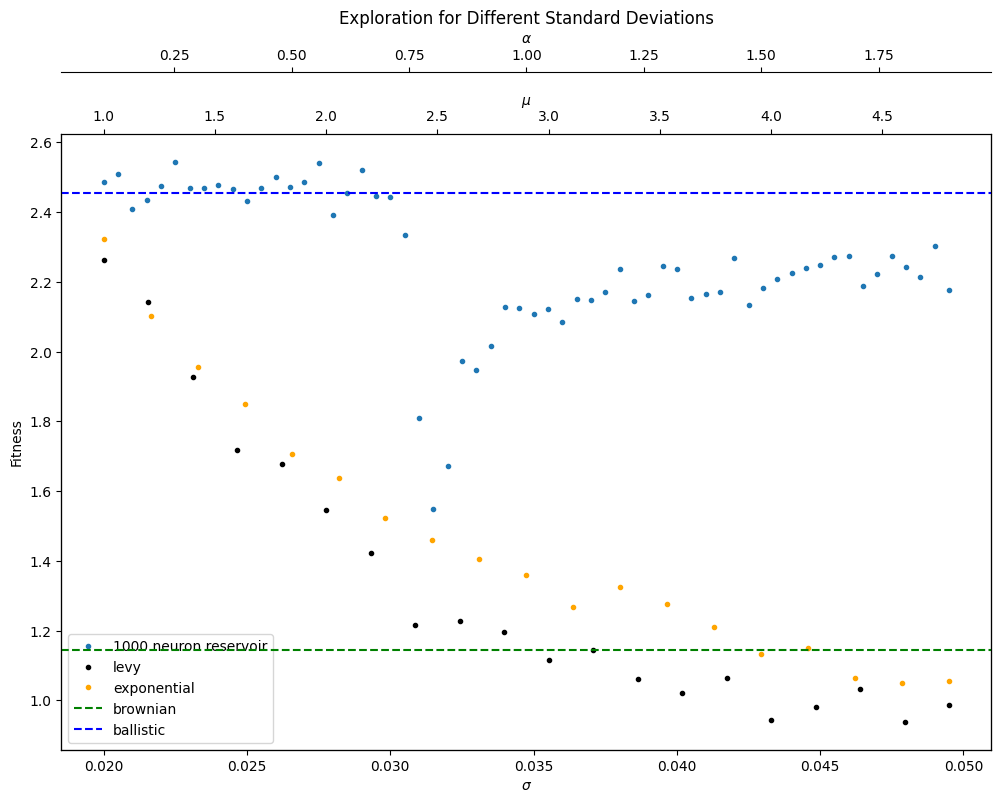

In [10]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# first x-axis for reservoir
for size in reservoir_sizes:
    ax1.plot(std_range, data['reservoir_' + str(size)], '.', label=f'{size} neuron reservoir')
ax1.set_xlabel(r'$\sigma$')
ax1.set_ylabel('Fitness')
ax1.set_title('Exploration for Different Standard Deviations')

# second x-axis for levy
ax2 = ax1.twiny()
ax2.plot(mu_range, data['levy'], '.', label='levy', color='black')
ax2.set_xlabel(r'$\mu$')

# third x-axis for exponential
ax3 = ax1.twiny()
ax3.spines["top"].set_position(("axes", 1.1))  # Offset third axis
ax3.plot(alpha_range, data['exponential'], '.', label='exponential', color='orange')
ax3.set_xlabel(r'$\alpha$')
ax3.xaxis.set_label_position('top')

# horizontal lines for brownian and ballistic
plt.axhline(y=data['brownian'], color='g', linestyle='--', label='brownian')
plt.axhline(y=data['ballistic'], color='b', linestyle='--', label='ballistic')

# combined legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2)
# add to combined legends
lines3, labels3 = ax3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3)

plt.show()

# Explicit Test Critical Reservoir Fitness and Lévy Fitness

Quick and dirty test run to see whether Lévy agents and critical reservoir agents have the same fitness in environments without periodic b.c.

In [ ]:
import os
os.chdir(os.path.join(os.getcwd(), "../code"))
import numpy as np
from parameters import Params
from simulation import Simulation
from tqdm import tqdm
from agent import ReservoirAgent, LévyAgent
params = Params.from_json('parameters.json')
params.save = False

params.type = 'reservoir'
params.agent = ReservoirAgent
sim = Simulation(params, params.agent)
print(np.mean(sim.run('None')))

params.type = 'levy'
params.agent = LévyAgent
sim = Simulation(params, params.agent)
print(np.mean(sim.run('None')))

1.774
1.529


That is not that much of a gap!